In [1]:
#connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading csv fie of dataset
df = pd.read_csv('/content/drive/MyDrive/covid19/covid19_tweets.csv')

In [4]:
#getting info of dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
#describing our dataframes
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [6]:
#counting the total enteries against each column
df.isnull().count()

user_name           179108
user_location       179108
user_description    179108
user_created        179108
user_followers      179108
user_friends        179108
user_favourites     179108
user_verified       179108
date                179108
text                179108
hashtags            179108
source              179108
is_retweet          179108
dtype: int64

In [7]:
#dropping na enteries
df = df.dropna()

In [8]:
#get a unique month
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([7, 8], dtype='int64', name='date')

In [9]:
#creating method to read the location values count for 7th and 8th month
top_july = df['user_location'][pd.DatetimeIndex(df['date']).month == 7].value_counts()
top_august = df['user_location'][pd.DatetimeIndex(df['date']).month == 8].value_counts()
top_all_the_time = (top_august + top_july).sort_values(ascending = False)

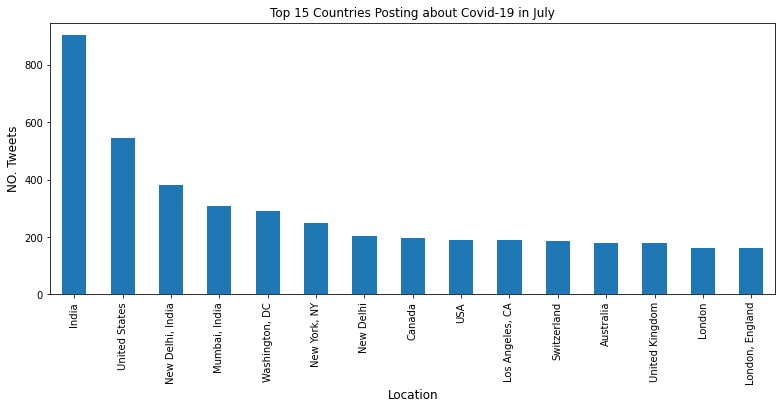

In [10]:
#plotting july tweets
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_july[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in July", )

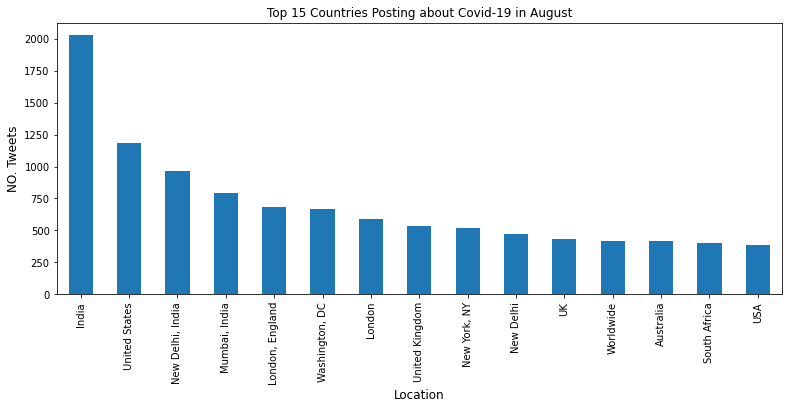

In [11]:
#plotting August tweets
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_august[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in August", )

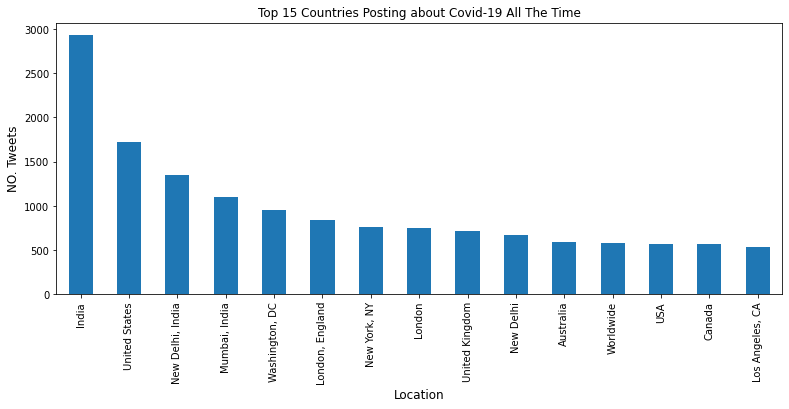

In [12]:
#plotting tweets of both months combined
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_all_the_time[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 All The Time", )